In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../input/train.csv')
data.drop('ID',axis=1, inplace=True)
data
df_test = pd.read_csv('../input/test.csv')

In [172]:
diseaseList = data.SUBCLASS.value_counts().rename_axis('disease').reset_index(name='counts')
diseaseList

,disease,counts
0,BRCA,786
1,KIPAN,515
2,GBMLGG,461
3,STES,379
4,KIRC,334
5,THCA,324
6,SKCM,276
7,PRAD,266
8,OV,253
9,LGG,229


In [173]:
disease_list = data.SUBCLASS.unique()
disease_list

array(['KIPAN', 'SARC', 'SKCM', 'KIRC', 'GBMLGG', 'STES', 'BRCA', 'THCA',
       'LIHC', 'HNSC', 'PAAD', 'OV', 'PRAD', 'UCEC', 'LAML', 'COAD',
       'ACC', 'LGG', 'LUSC', 'LUAD', 'CESC', 'PCPG', 'THYM', 'BLCA',
       'TGCT', 'DLBC'], dtype=object)

In [174]:
def drawing_class_dist(disease, top=0, base=0):
    df_ = data.copy()
    count_df = df_[df_.SUBCLASS==disease].apply(lambda x : x!='WT').agg(sum)
    count_df = count_df[2:].reset_index(name='count')        
    #num_transaction = diseaseList[diseaseList.disease == disease]['counts'].values[0]
    cdf_sub = count_df[count_df['count']>base]
    if base > 0:
        lowers =  count_df[count_df['count']<=base]
        print(lowers)

    print(cdf_sub.sort_values(by='count', ascending=False))
    cdf_sub.plot()
    #sdf = cdf_sub.sort_values(by='count', ascending=False)[top:]

In [175]:
def cleansing_bottoms(disease, top=0, base=0):
    df_ = data.copy()
    count_df = df_[df_.SUBCLASS==disease].apply(lambda x : x!='WT').agg(sum)
    count_df = count_df[2:].reset_index(name='count')        
    #num_transaction = diseaseList[diseaseList.disease == disease]['counts'].values[0]
    cdf_sub = count_df[count_df['count']>base]
    if base > 0:
        lowers =  count_df[count_df['count']<=base]
        reference = pd.read_csv('../reference_data/'+disease+'.csv')
        print(lowers)
        not_inters = set(lowers['index']) - (set(reference['g.name']))
        print(len(not_inters))
        # WT 로 무력화~~~
        for ni in not_inters:
            #data.loc[data.SUBCLASS ==  disease, ni] = 'WT'
            df_test[ni] = 'WT'

    print(cdf_sub.sort_values(by='count', ascending=False))
    
    #sdf = cdf_sub.sort_values(by='count', ascending=False)[top:]

In [250]:
train_df = data.copy()
#df_test = df_test.drop('ID', axis=1)
test_df = df_test.applymap(lambda x : 0 if x=='WT' else 1)



In [258]:
train_df = train_df.applymap(lambda x : 0 if x=='WT' else 1  )

In [260]:
train_df

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6199,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
# Get the combined data
total_df = pd.concat([train_df.drop('SUBCLASS', axis=1), test_df], axis=0).drop('ID', axis=1)
total_df

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,0,0,0,0,0,1,1,1,1,1,...,1,1,0,0,1,0,1,1,0,0
2544,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
train_df = train_df.drop('SUBCLASS',axis=1)
zero_std_cols = train_df.columns[train_df.std() == 0]

In [272]:
# Columns to drop because there is no variation in training set
# train, test 병합

total_df.drop(zero_std_cols, axis=1, inplace=True)
print(f">> Removed {len(zero_std_cols)} constant columns")

>> Removed 154 constant columns


In [273]:
total_df

,A2M,AAAS,AADAT,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,0,0,0,0,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,0,0
2544,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
import numpy as np


# Removing duplicate columns
# Taken from: https://www.kaggle.com/scirpus/santander-poor-mans-tsne
colsToRemove = []
colsScaned = []
dupList = {}
columns = total_df.columns
for i in range(len(columns)-1):
    v = train_df[columns[i]].values
    dupCols = []
    for j in range(i+1,len(columns)):
        if np.array_equal(v, train_df[columns[j]].values):
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j])
                dupList[columns[i]] = dupCols
colsToRemove = list(set(colsToRemove))
total_df.drop(colsToRemove, axis=1, inplace=True)
print(f">> Dropped {len(colsToRemove)} duplicate columns")


>> Dropped 0 duplicate columns


In [279]:
import copy
import gc
from sklearn.preprocessing import scale

# Go through the columns one at a time (can't do it all at once for this dataset)
total_df_all = copy.deepcopy(total_df)              
for col in total_df.columns:    
    # 3 * 표준편차를 통해서 데이터 99% 밖에 있는 이상치를 제거
    data = total_df[col].values
    data_mean, data_std = np.mean(data), np.std(data)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data if x < lower or x > upper]

    # If there are crazy high values, do a log-transform
    #if len(outliers) > 0:
    #    non_zero_idx = data != 0
    #    total_df.loc[non_zero_idx, col] = np.log(data[non_zero_idx])
    
    # Scale non-zero column values
    nonzero_rows = total_df[col] != 0
    total_df.loc[nonzero_rows, col] = scale(total_df.loc[nonzero_rows, col])
    
    # Scale all column values
    total_df_all[col] = scale(total_df_all[col])
    gc.collect()
    
# 후에 train, test 분할하는 과정에서 필요한 인덱스 저장
train_idx = range(0, len(train_df))
test_idx = range(len(train_df), len(total_df))

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required by the scale function.

In [291]:
train_idx = range(0, len(train_df))
test_idx = range(len(train_df), len(total_df))

In [292]:
from sklearn.decomposition import PCA
import itertools 
# pca 함수
def test_pca(data, create_plots=True):
    """Run PCA analysis, return embedding"""
    
    # Create a PCA object, specifying how many components we wish to keep
    # 주성분의 갯수는 1000개
    pca = PCA(n_components=1000)

    # Run PCA on scaled numeric dataframe, and retrieve the projected data
    pca_trafo = pca.fit_transform(data)    

    # The transformed data is in a numpy matrix. This may be inconvenient if we want to further
    # process the data, and have a more visual impression of what each column is etc. We therefore
    # put transformed/projected data into new dataframe, where we specify column names and index
    pca_df = pd.DataFrame(
        pca_trafo,
        index=total_df.index,
        columns=["PC" + str(i + 1) for i in range(pca_trafo.shape[1])]
    )

    # Only construct plots if requested
    if create_plots:
        
        # Create two plots next to each other
        _, axes = plt.subplots(2, 2, figsize=(20, 15))
        axes = list(itertools.chain.from_iterable(axes))

        # Plot the explained variance# Plot t 
        axes[0].plot(
            pca.explained_variance_ratio_, "--o", linewidth=2,
            label="Explained variance ratio"
        )

        # Plot the cumulative explained variance
        axes[0].plot(
            pca.explained_variance_ratio_.cumsum(), "--o", linewidth=2,
            label="Cumulative explained variance ratio"
        )

        # Show legend
        axes[0].legend(loc="best", frameon=True)

        # Show biplots
        for i in range(1, 4):

            # Components to be plottet
            x, y = "PC"+str(i), "PC"+str(i+1)

            # Plot biplots
            settings = {'kind': 'scatter', 'ax': axes[i], 'alpha': 0.2, 'x': x, 'y': y}
            pca_df.iloc[train_idx].plot(label='Train', c='#ff7f0e', **settings)
            pca_df.iloc[test_idx].plot(label='Test',  c='#1f77b4', **settings)    

        # Show the plot
        plt.show()
    
    return pca_df

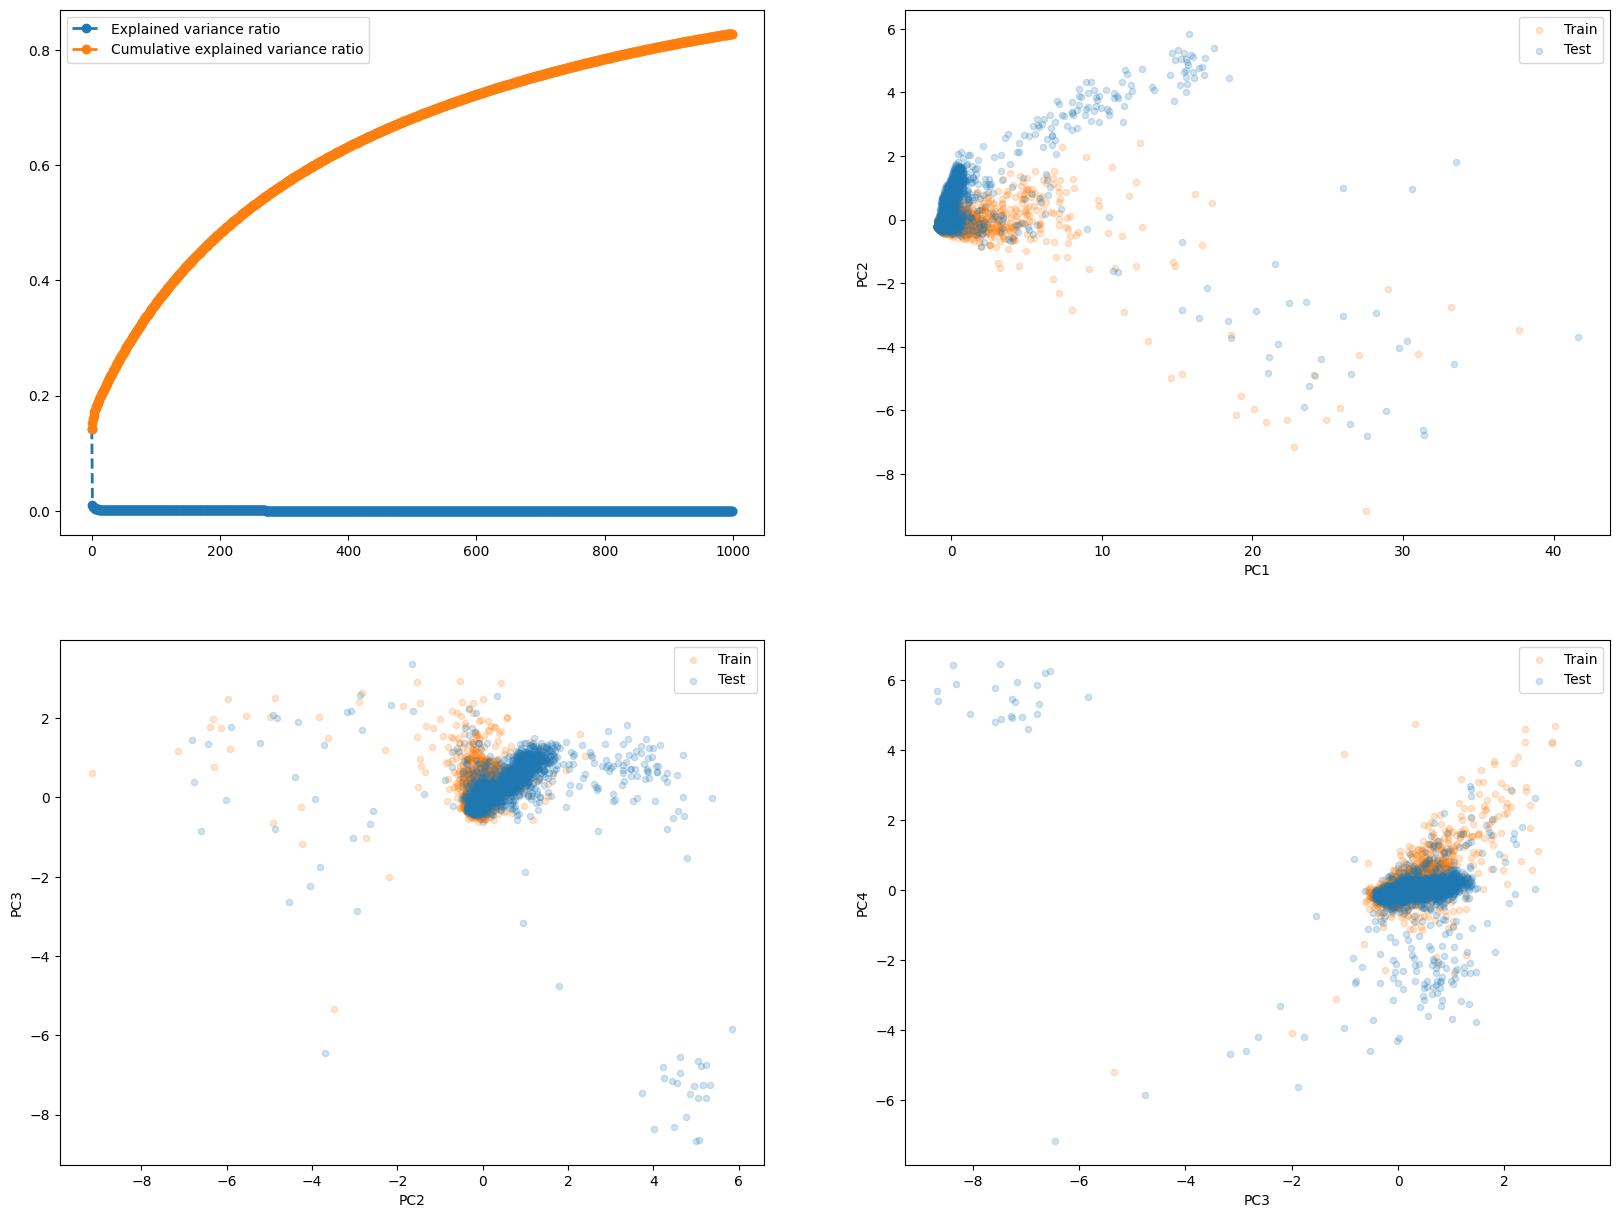

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC991,PC992,PC993,PC994,PC995,PC996,PC997,PC998,PC999,PC1000
0,-0.400476,-0.292154,-0.182502,-0.005207,-0.235684,-0.170307,0.079091,-0.018096,-0.082179,-0.087616,...,0.046455,0.004477,0.007324,0.038324,0.065022,0.002159,-0.094585,0.131861,-0.053820,0.038363
1,-0.608006,0.001115,0.041442,0.075474,0.309404,0.754358,0.120186,-0.076282,-0.008414,-0.009756,...,0.002526,-0.054292,-0.105209,-0.009197,-0.089152,-0.053945,0.120567,-0.050107,0.051609,0.010462
2,1.528403,-0.671012,0.266020,1.205510,-1.009630,0.172958,-0.614145,-0.165305,-0.203980,-0.131211,...,-0.300230,0.003440,-0.067461,0.114878,-0.124199,-0.139535,-0.096432,0.062172,-0.047298,0.067332
3,-0.769931,-0.243789,-0.258188,-0.007606,-0.131559,-0.115619,-0.105798,0.021126,-0.012491,-0.085631,...,-0.049685,-0.028231,-0.051583,-0.010670,-0.014993,0.068646,0.017098,0.007830,-0.004939,-0.015694
4,-0.230531,0.077449,0.413671,0.137714,0.385625,0.359539,0.087217,0.165516,-0.033743,-0.182931,...,0.089049,-0.119420,0.349389,-0.213443,0.173348,-0.001967,0.183912,-0.055629,0.100327,-0.155141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0.267385,1.411236,0.951789,0.149491,1.118022,-0.483980,-0.537060,0.244721,-0.058660,-0.252153,...,0.096316,0.275558,0.132605,-0.078752,0.021343,0.054986,0.159991,0.024248,0.078500,-0.055106
2542,-0.620300,-0.020975,0.047136,0.085403,0.304348,0.577729,0.164521,-0.280513,0.028402,0.007552,...,0.179814,0.129662,-0.040260,-0.046188,0.097928,0.013744,0.064518,0.029824,-0.002274,-0.068388
2543,25.994130,0.981408,-1.878768,-5.630417,-1.066980,1.917028,-0.692750,0.531018,-2.556936,0.682278,...,0.037445,0.016230,0.050747,0.027147,-0.000264,0.028715,0.040423,0.022802,-0.006557,-0.042173
2544,-0.826675,-0.257709,-0.259833,-0.072081,-0.144009,-0.157368,-0.056431,-0.102840,0.030392,0.006623,...,0.022035,-0.083677,0.110291,-0.010112,0.037440,-0.064859,-0.034071,-0.061976,0.013099,0.052457


In [293]:
#test_df = test_df.drop('ID', axis=1)
test_pca(total_df)

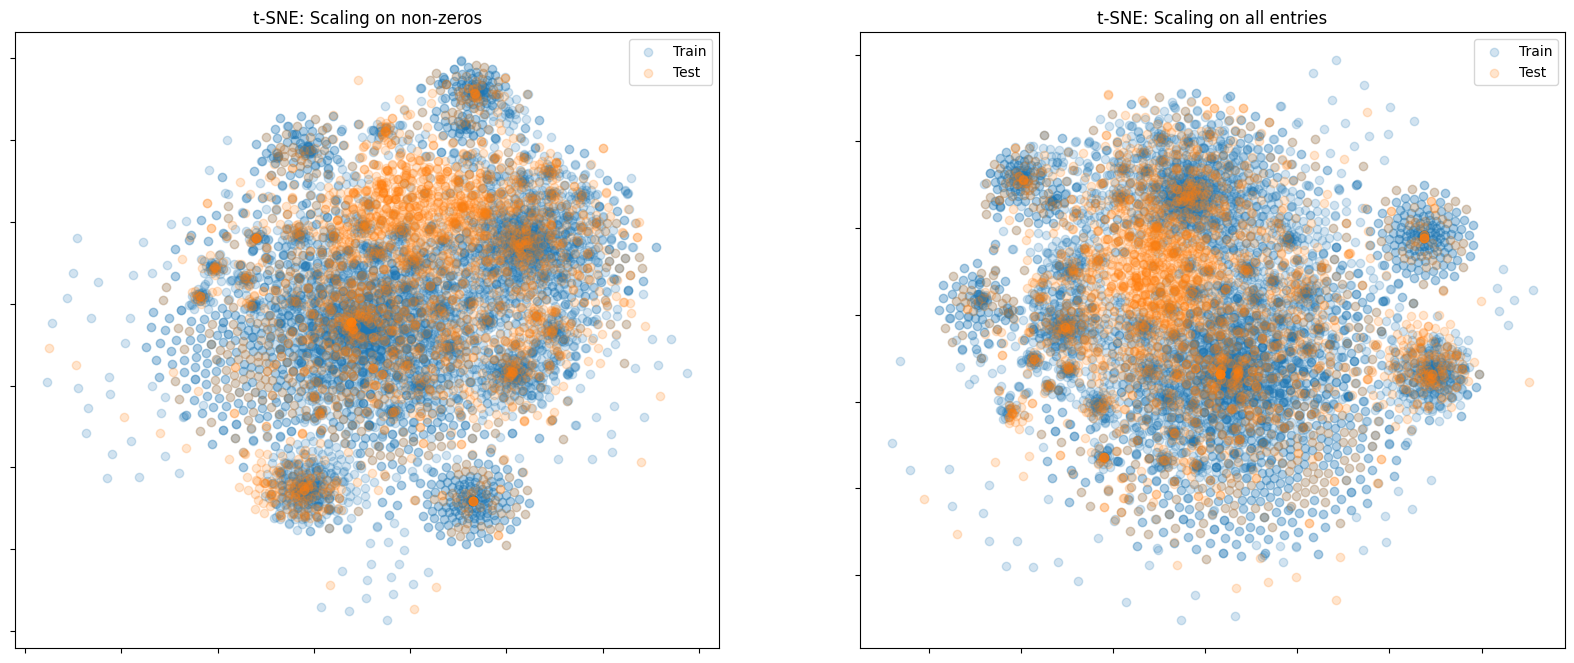

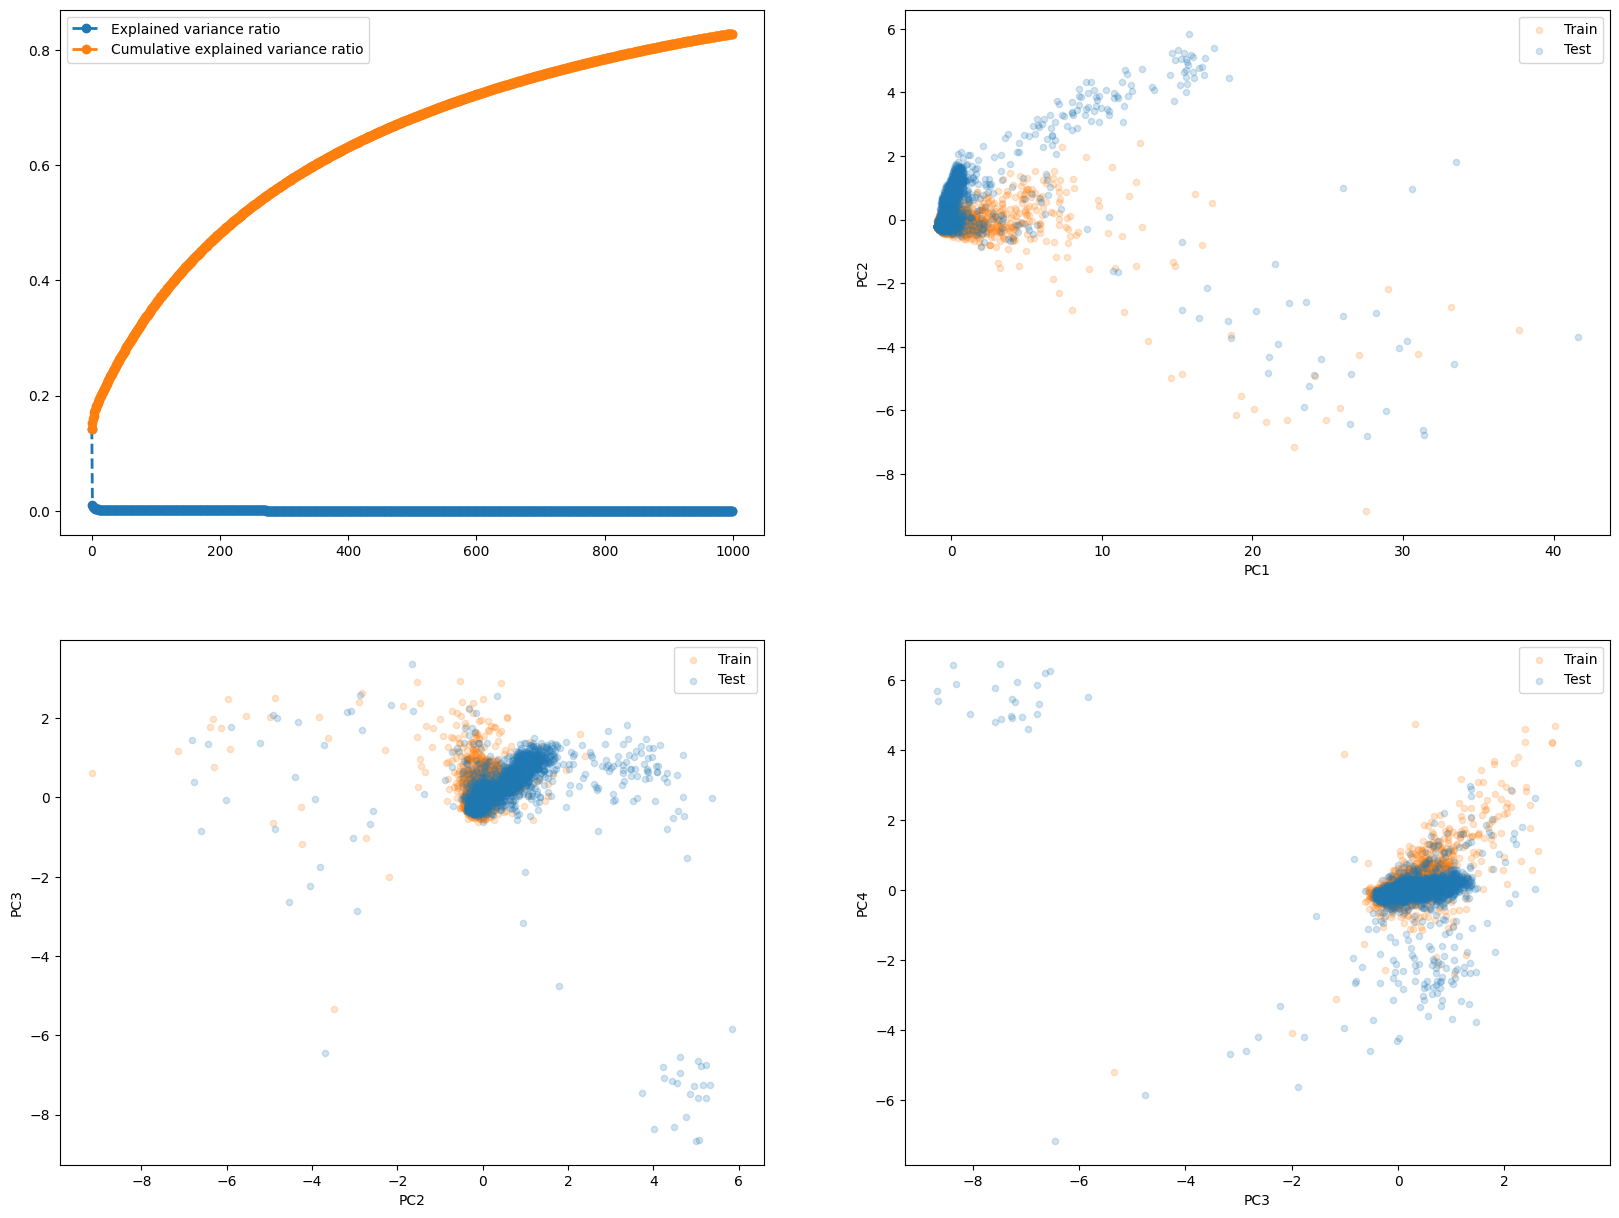

In [297]:
from sklearn.manifold import TSNE
from matplotlib import ticker
def test_tsne(data, ax=None, title='t-SNE'):
    """Run t-SNE and return embedding"""

    # Run t-SNE
    tsne = TSNE(n_components=2, init='pca')
    Y = tsne.fit_transform(data)

    # Create plot
    for name, idx in zip(["Train", "Test"], [train_idx, test_idx]):
        ax.scatter(Y[idx, 0], Y[idx, 1], label=name, alpha=0.2)
        ax.set_title(title)
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.legend()        
    return Y

# Run t-SNE on PCA embedding
# PCA 차원에 임베딩된 데이터를 활용한 t-sne수행
_, axes = plt.subplots(1, 2, figsize=(20, 8))

tsne_df = test_tsne(
    pca_df, axes[0],
    title='t-SNE: Scaling on non-zeros'
)
tsne_df_unique = test_tsne(
    pca_df_all, axes[1],
    title='t-SNE: Scaling on all entries'
)

plt.axis('tight')
plt.show()
pca_df = test_pca(total_df)
pca_df_all = test_pca(total_df_all, create_plots=False)

In [298]:
from sklearn import manifold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
def test_prediction(data):
    """Try to classify train/test samples from total dataframe"""

    # Create a target which is 1 for training rows, 0 for test rows
    y = np.zeros(len(data))
    y[train_idx] = 1

    # Perform shuffled CV predictions of train/test label
    predictions = cross_val_predict(
        ExtraTreesClassifier(n_estimators=100, n_jobs=4),
        data, y,
        cv=StratifiedKFold(
            n_splits=10,
            shuffle=True,
            random_state=42
        )
    )

    # Show the classification report
    print(classification_report(y, predictions))
    
# Run classification on total raw data
test_prediction(total_df_all)

              precision    recall  f1-score   support

         0.0       0.63      0.46      0.53      2546
         1.0       0.80      0.89      0.84      6201

    accuracy                           0.77      8747
   macro avg       0.72      0.68      0.69      8747
weighted avg       0.75      0.77      0.75      8747



100%|██████████| 4230/4230 [00:13<00:00, 307.10it/s]


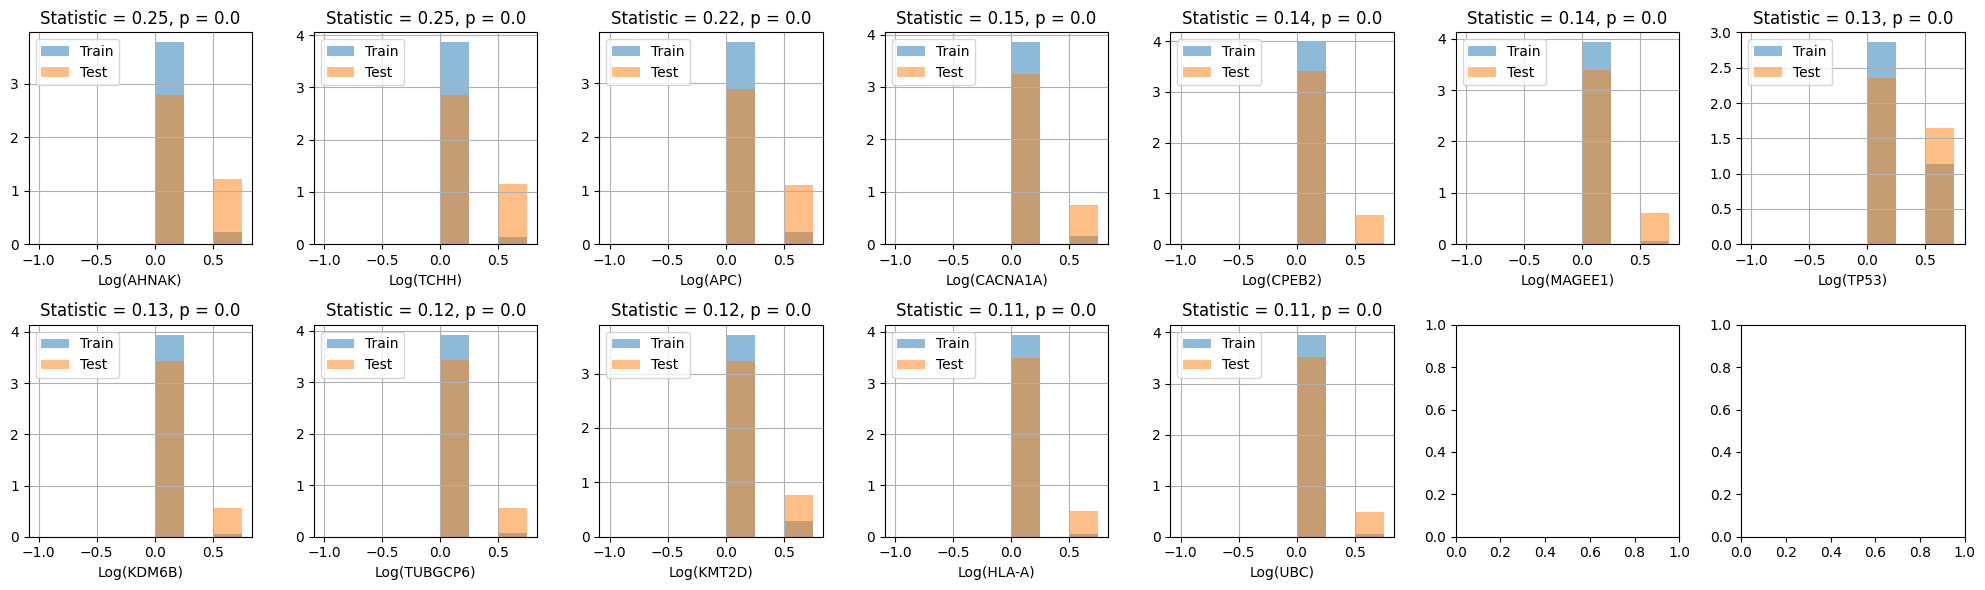

In [304]:
from tqdm import tqdm
from scipy.stats import ks_2samp
import numpy as np

def get_diff_columns(train_df, test_df, show_plots=True, show_all=False, threshold=0.1):
    """Use KS to estimate columns where distributions differ a lot from each other"""

    # Find the columns where the distributions are very different
    diff_data = []
    for col in tqdm(train_df.columns):
        statistic, pvalue = ks_2samp(
            train_df[col].values, 
            test_df[col].values
        )
        if pvalue <= 0.05 and np.abs(statistic) > threshold:
            diff_data.append({'feature': col, 'p': np.round(pvalue, 5), 'statistic': np.round(np.abs(statistic), 2)})

    # Put the differences into a dataframe
    diff_df = pd.DataFrame(diff_data).sort_values(by='statistic', ascending=False)

    if show_plots:
        # Let us see the distributions of these columns to confirm they are indeed different
        n_cols = 7
        if show_all:
            n_rows = int(len(diff_df) / 7)
        else:
            n_rows = 2
        _, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
        axes = [x for l in axes for x in l]

        # Create plots
        for i, (_, row) in enumerate(diff_df.iterrows()):
            if i >= len(axes):
                break
            extreme = np.max(np.abs(train_df[row.feature].tolist() + test_df[row.feature].tolist()))
            train_df.loc[:, row.feature].apply(np.log1p).hist(
                ax=axes[i], alpha=0.5, label='Train', density=True,
                bins=np.arange(-extreme, extreme, 0.25)
            )
            test_df.loc[:, row.feature].apply(np.log1p).hist(
                ax=axes[i], alpha=0.5, label='Test', density=True,
                bins=np.arange(-extreme, extreme, 0.25)
            )
            axes[i].set_title(f"Statistic = {row.statistic}, p = {row.p}")
            axes[i].set_xlabel(f'Log({row.feature})')
            axes[i].legend()

        plt.tight_layout()
        plt.show()
        
    return diff_df

# Get the columns which differ a lot between test and train
diff_df = get_diff_columns(total_df.iloc[train_idx], total_df.iloc[test_idx])

In [ ]:
# AHNAK, TCHH, APC, CACNA1A, CPEB2, MAGEE1, TP53, KDM6B, TUBGCP6, KMT2D, HLA-A, UBC

In [303]:
# 통계분석을(유의확률 비교) 통해 분포가 다르다고 도출되는 변수들을 제거했을 때
print(f">> Dropping {len(diff_df)} features based on KS tests")
test_prediction(
    total_df.drop(diff_df.feature.values, axis=1)
)

>> Dropping 12 features based on KS tests
              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50      2546
         1.0       0.79      0.88      0.83      6201

    accuracy                           0.75      8747
   macro avg       0.70      0.66      0.67      8747
weighted avg       0.74      0.75      0.74      8747



In [307]:
df

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [308]:
train_df['SUBCLASS'] = df['SUBCLASS']

In [310]:
enc= LabelEncoder()

In [311]:

train_df['SUBCLASS'] = enc.fit_transform(train_df['SUBCLASS'])

In [322]:
train_df.SUBCLASS

0        8
1       19
2       20
3        9
4        6
        ..
6196    13
6197    11
6198     4
6199    22
6200    20
Name: SUBCLASS, Length: 6201, dtype: int64

In [321]:
np.log1p(train_df.SUBCLASS)

0       2.197225
1       2.995732
2       3.044522
3       2.302585
4       1.945910
          ...   
6196    2.639057
6197    2.484907
6198    1.609438
6199    3.135494
6200    3.044522
Name: SUBCLASS, Length: 6201, dtype: float64

>> Ran TruncatedSVD
>> Ran PCA
>> Ran FastICA
>> Ran GaussianRandomProjection
>> Ran SparseRandomProjection


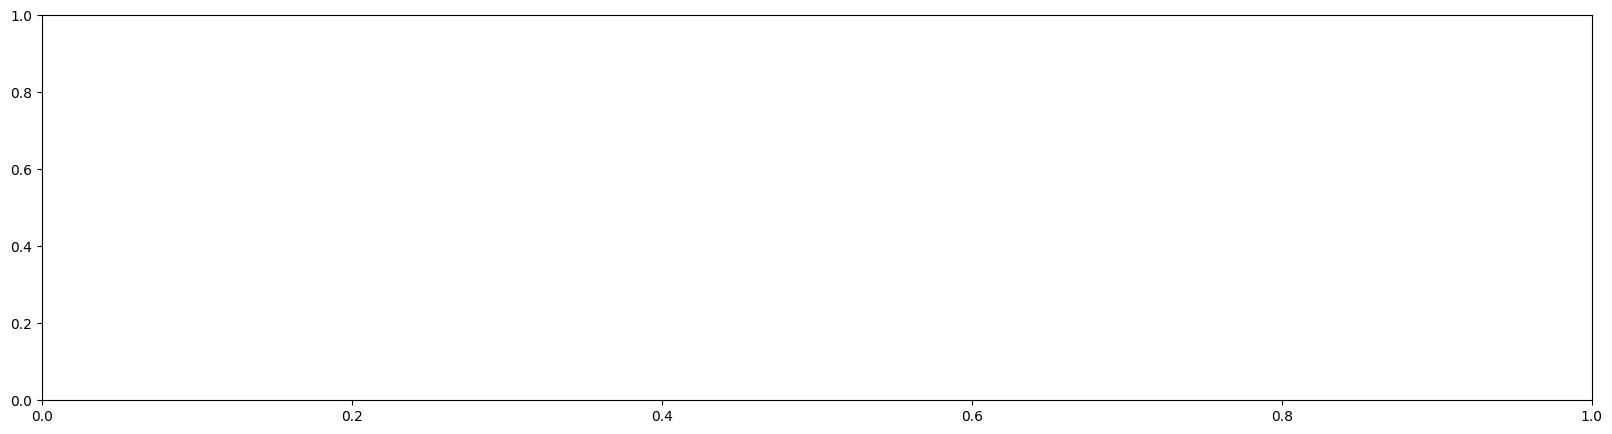

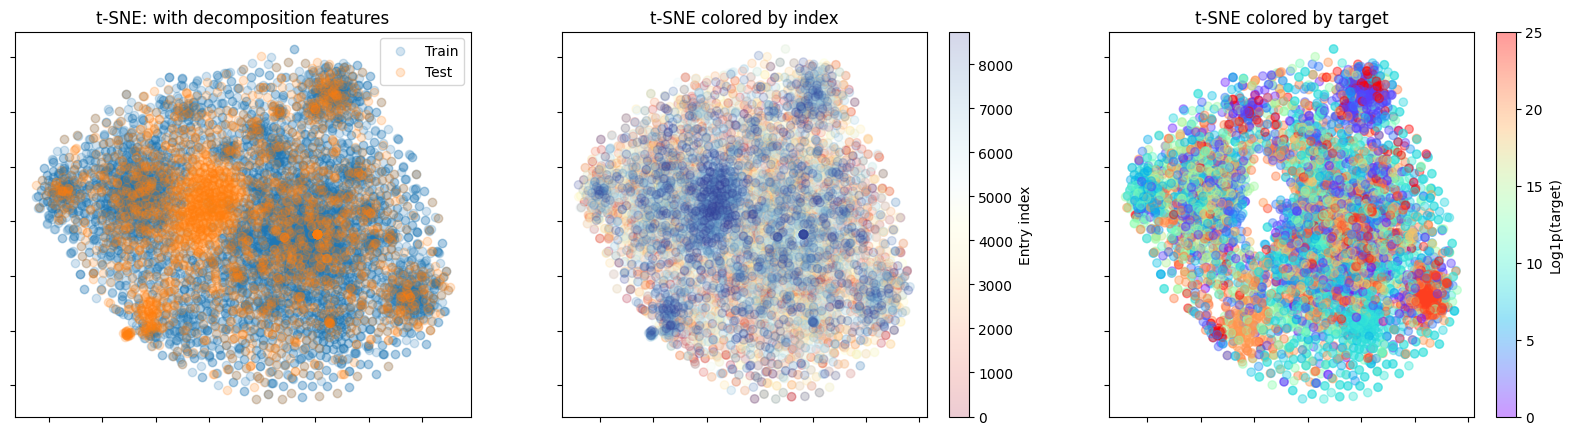

In [326]:

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
COMPONENTS = 20
cm = plt.cm.get_cmap('RdYlBu')
#cm2 = plt.cm.get_cmap('gist_ncar')
cm2 = plt.cm.get_cmap('rainbow')
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
# List of decomposition methods to use
methods = [
    TruncatedSVD(n_components=COMPONENTS),
    PCA(n_components=COMPONENTS),
    FastICA(n_components=COMPONENTS),
    GaussianRandomProjection(n_components=COMPONENTS, eps=0.1),
    SparseRandomProjection(n_components=COMPONENTS, dense_output=True)    
]

# Run all the methods
embeddings = []
for method in methods:
    name = method.__class__.__name__    
    embeddings.append(
        pd.DataFrame(method.fit_transform(total_df), columns=[f"{name}_{i}" for i in range(COMPONENTS)])
    )
    print(f">> Ran {name}")
    
# Put all components into one dataframe
components_df = pd.concat(embeddings, axis=1)

# Prepare plot
_, axes = plt.subplots(1, 3, figsize=(20, 5))

# Run t-SNE on components
tsne_df = test_tsne(
    components_df, axes[0],
    title='t-SNE: with decomposition features'
)

# Color by index
sc = axes[1].scatter(tsne_df[:, 0], tsne_df[:, 1], alpha=0.2, c=range(len(tsne_df)), cmap=cm)
cbar = fig.colorbar(sc, ax=axes[1])
cbar.set_label('Entry index')
axes[1].set_title("t-SNE colored by index")
axes[1].xaxis.set_major_formatter(ticker.NullFormatter())
axes[1].yaxis.set_major_formatter(ticker.NullFormatter())

# Color by target
sc = axes[2].scatter(tsne_df[train_idx, 0], tsne_df[train_idx, 1], alpha=0.4, c=train_df.SUBCLASS, cmap=cm2)
cbar = fig.colorbar(sc, ax=axes[2])
cbar.set_label('Log1p(target)')
axes[2].set_title("t-SNE colored by target")
axes[2].xaxis.set_major_formatter(ticker.NullFormatter())
axes[2].yaxis.set_major_formatter(ticker.NullFormatter())

plt.axis('tight')
plt.show()  

100%|██████████| 100/100 [00:02<00:00, 43.42it/s]


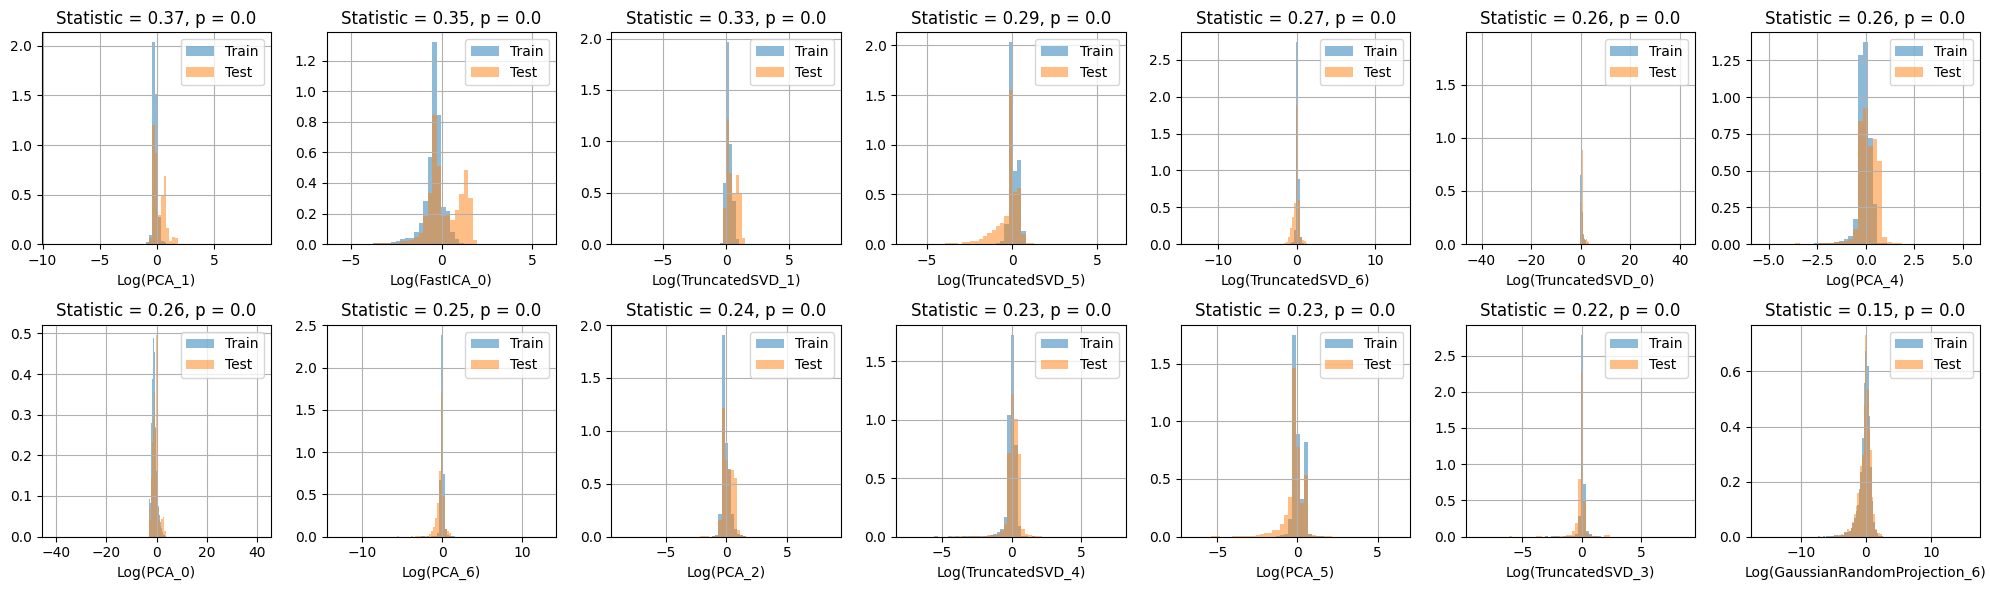

>> Dropping 33 features based on KS tests
              precision    recall  f1-score   support

         0.0       0.58      0.19      0.28      2546
         1.0       0.74      0.94      0.83      6201

    accuracy                           0.72      8747
   macro avg       0.66      0.57      0.56      8747
weighted avg       0.69      0.72      0.67      8747



In [313]:
# Get the columns which differ a lot between test and train
diff_df = get_diff_columns(
    components_df.iloc[train_idx], components_df.iloc[test_idx],
    threshold=0.1
)

# Run classification on total raw data
print(f">> Dropping {len(diff_df)} features based on KS tests")
test_prediction(
    components_df.drop(diff_df.feature.values, axis=1)
)


In [317]:
enc.classes_

array(['ACC', 'BLCA', 'BRCA', 'CESC', 'COAD', 'DLBC', 'GBMLGG', 'HNSC',
       'KIPAN', 'KIRC', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV',
       'PAAD', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'STES', 'TGCT', 'THCA',
       'THYM', 'UCEC'], dtype=object)

In [314]:
diff_df

,feature,p,statistic
10,PCA_1,0.0,0.37
16,FastICA_0,0.0,0.35
1,TruncatedSVD_1,0.0,0.33
5,TruncatedSVD_5,0.0,0.29
6,TruncatedSVD_6,0.0,0.27
0,TruncatedSVD_0,0.0,0.26
12,PCA_4,0.0,0.26
9,PCA_0,0.0,0.26
14,PCA_6,0.0,0.25
11,PCA_2,0.0,0.24


In [315]:
components_df

,TruncatedSVD_0,TruncatedSVD_1,TruncatedSVD_2,TruncatedSVD_3,TruncatedSVD_4,TruncatedSVD_5,TruncatedSVD_6,TruncatedSVD_7,TruncatedSVD_8,TruncatedSVD_9,...,SparseRandomProjection_10,SparseRandomProjection_11,SparseRandomProjection_12,SparseRandomProjection_13,SparseRandomProjection_14,SparseRandomProjection_15,SparseRandomProjection_16,SparseRandomProjection_17,SparseRandomProjection_18,SparseRandomProjection_19
0,0.531072,-0.045487,0.125710,0.073955,-0.163007,-0.042005,0.146130,0.022245,-0.067097,-0.073779,...,-1.803309,0.000000,1.803309,0.000000,0.000000,0.000000,0.000000,1.803309,0.000000,0.000000
1,0.371253,0.554594,0.342191,0.134651,0.373769,0.756746,0.017582,0.122310,-0.040496,-0.117535,...,0.000000,0.000000,1.803309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.481487,-0.060920,0.854015,1.006286,-1.146424,0.141648,-0.606323,0.148838,-0.191714,0.026588,...,0.000000,1.803309,3.606618,-1.803309,5.409926,3.606618,0.000000,1.803309,0.000000,0.000000
3,0.166473,0.013043,0.077138,0.108709,-0.043328,0.002127,-0.038352,-0.059251,0.003474,-0.028848,...,0.000000,0.000000,0.000000,-1.803309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.768178,0.795798,0.587974,0.058844,0.355263,0.333711,0.039893,-0.178658,0.004024,-0.070489,...,0.000000,0.000000,0.000000,-3.606618,0.000000,0.000000,0.000000,-1.803309,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,1.310287,2.042955,0.187412,-0.165117,0.833143,-0.817556,-0.552197,-0.232983,-0.026484,-0.223275,...,0.000000,0.000000,0.000000,1.803309,1.803309,0.000000,-3.606618,-1.803309,0.000000,0.000000
8743,0.355429,0.515125,0.340172,0.135981,0.354161,0.582477,0.074873,0.330068,0.029336,0.040670,...,0.000000,1.803309,0.000000,-1.803309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8744,26.774952,-2.171989,-3.753334,-4.737967,0.072391,2.400163,-0.897245,-0.083542,-1.624857,-0.944181,...,-3.606618,12.623161,12.623161,-16.229779,3.606618,1.803309,-3.606618,5.409926,-16.229779,-9.016544
8745,0.106168,-0.022860,0.059088,0.046420,-0.049370,-0.031296,0.018690,0.064751,0.021630,0.023288,...,0.000000,0.000000,-1.803309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [316]:
train_idx

range(0, 6201)

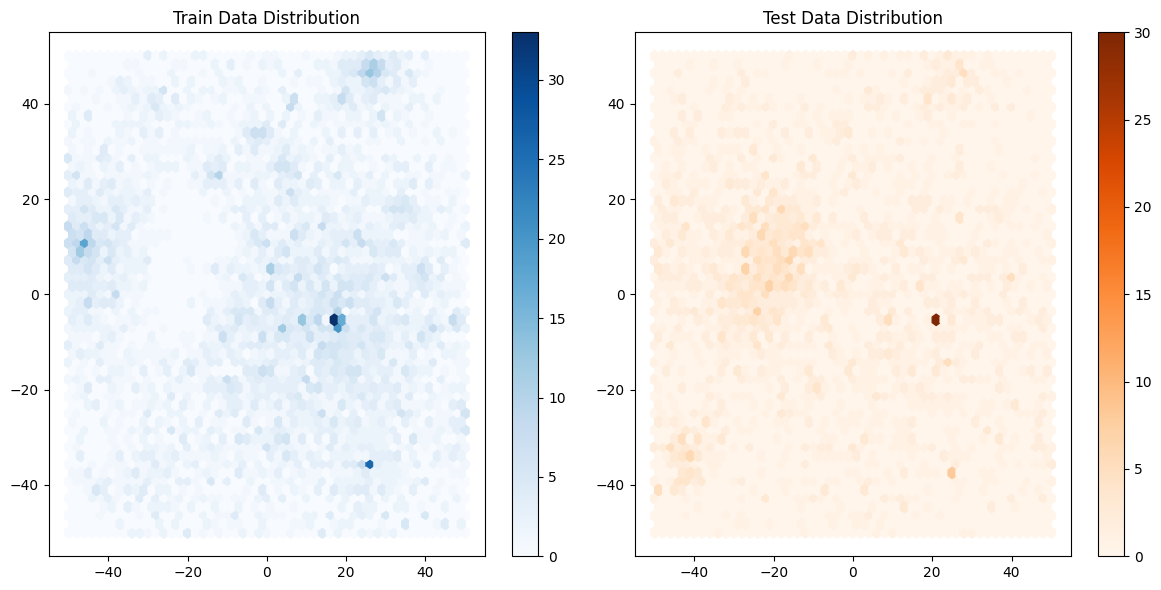

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 가정: tsne_result가 t-SNE로 변환된 데이터의 좌표이고,
# train_idx, test_idx가 각각 train과 test 데이터를 나타내는 인덱스임

# 예시로 t-SNE 변환된 좌표가 있을 때
# tsne_result = 모델을 통해 얻은 t-SNE 결과 (N x 2 배열)

train_tsne = tsne_df[train_idx]  # Train 데이터의 t-SNE 좌표
test_tsne = tsne_df[test_idx]    # Test 데이터의 t-SNE 좌표

# 2D 히스토그램으로 Train/Test 데이터의 밀도 확인
plt.figure(figsize=(12, 6))

# Train 데이터 분포
plt.subplot(1, 2, 1)
plt.hexbin(train_tsne[:, 0], train_tsne[:, 1], gridsize=50, cmap='Blues', extent=[-50, 50, -50, 50])
plt.title('Train Data Distribution')
plt.colorbar()

# Test 데이터 분포
plt.subplot(1, 2, 2)
plt.hexbin(test_tsne[:, 0], test_tsne[:, 1], gridsize=50, cmap='Oranges', extent=[-50, 50, -50, 50])
plt.title('Test Data Distribution')
plt.colorbar()

plt.tight_layout()
plt.show()


In [329]:
from scipy.spatial import KDTree

# Train 데이터의 KDTree를 만들고
train_tree = KDTree(train_tsne)

# 각 Test 데이터 포인트에서 Train 데이터까지의 거리를 계산
distances, _ = train_tree.query(test_tsne)

# 일정 거리 이상으로 떨어져 있는 Test 데이터 포인트 탐색
threshold_distance = 2.0  # 이 값을 조정하여 빈 영역의 기준을 설정
empty_test_indices = np.where(distances > threshold_distance)[0]

print("빈 영역에 있는 Test 데이터 인덱스:", empty_test_indices)


빈 영역에 있는 Test 데이터 인덱스: [  15   20   21   25   28   31   34   38   39   48   52   65   68   76
   84   96   98   99  105  107  108  109  114  129  157  158  171  172
  197  210  216  230  240  248  258  268  280  290  292  299  300  304
  308  309  312  313  317  330  346  348  349  353  354  356  362  364
  368  385  400  403  414  419  421  423  425  426  427  429  434  436
  453  457  460  464  465  466  468  470  487  488  502  509  510  514
  526  527  530  531  532  543  554  555  567  569  570  575  580  581
  584  587  591  596  597  601  606  615  620  624  628  629  630  631
  633  634  640  651  653  658  663  665  667  671  675  678  682  685
  688  697  704  717  725  734  744  747  751  753  756  760  764  766
  768  773  774  775  777  778  779  792  795  797  799  801  807  808
  816  818  829  839  847  859  861  862  863  867  870  874  882  888
  892  908  916  918  919  928  933  937  939  946  948  949  959  963
  966  969  973  977  980  983  984 1000 1005 1010 102

In [330]:
len(empty_test_indices)

450

In [289]:
total_df

,A2M,AAAS,AADAT,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,0,0,0,0,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,0,0
2544,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
total_df

,A2M,AAAS,AADAT,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,0,0,0,0,1,1,1,1,1,1,...,1,1,0,0,1,0,1,1,0,0
2544,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
df_test['ABCB8'].apply(lambda x : x!='WT').agg(sum)

48

In [180]:
cleansing_bottoms('KIPAN',0,1)

       index  count
1      AADAT      1
2      AARS1      0
3       ABAT      0
17     ABCB8      1
18     ABCB9      1
...      ...    ...
4375  ZNF639      0
4376  ZNF707      1
4378   ZNRF4      1
4379    ZPBP      1
4381   ZWINT      1

[2509 rows x 2 columns]
2353
       index  count
4279     VHL    154
1181     DST     27
2150   KMT2D     26
2487    MTOR     25
2818  PABPC1     24
...      ...    ...
4311     WLS      2
4312    WNK4      2
4315    WNT2      2
4320  WRAP73      2
4321     WRN      2

[1874 rows x 2 columns]


In [181]:
cleansing_bottoms('BRCA',0,3)

      index  count
0      AAAS      2
1     AADAT      2
2     AARS1      0
18    ABCB9      1
26    ABCD2      3
...     ...    ...
4378  ZNRF4      3
4379   ZPBP      2
4380   ZW10      3
4381  ZWINT      3
4382    ZYX      2

[3048 rows x 2 columns]
2715
       index  count
2976  PIK3CA    250
4106    TP53    218
699     CDH1     73
1550   GATA3     58
2301  MAP3K1     56
...      ...    ...
2891    PDK4      4
2911    PENK      4
2939     PGD      4
2966    PHYH      4
2974    PIGQ      4

[1335 rows x 2 columns]


In [182]:
cleansing_bottoms('SKCM', 0, 5)

       index  count
0       AAAS      5
1      AADAT      5
2      AARS1      0
15     ABCB6      4
25     ABCD1      4
...      ...    ...
4371  ZNF185      4
4375  ZNF639      2
4376  ZNF707      3
4380    ZW10      4
4381   ZWINT      1

[2272 rows x 2 columns]
2261
       index  count
473     BRAF    139
2856    PCLO    133
2503   MXRA5    105
2514    MYH1     91
2519    MYH4     90
...      ...    ...
1413    FBP1      6
1419   FBXO7      6
1421  FBXW11      6
1440    FGD4      6
2642  NFE2L1      6

[2111 rows x 2 columns]


In [183]:
cleansing_bottoms('HNSC', 2, 1)
cleansing_bottoms('COAD', 0, 2)
cleansing_bottoms('UCEC', 0, 2)
cleansing_bottoms('SARC', 0, 2)
#cleansing_bottoms('LUAD', 0, 2)
cleansing_bottoms('LUSC', 0, 2)
cleansing_bottoms('LIHC', 0, 1)
cleansing_bottoms('CESC', 0, 2)
cleansing_bottoms('PAAD', 0, 1)
cleansing_bottoms('ACC', 0, 1)

       index  count
1      AADAT      0
2      AARS1      0
17     ABCB8      0
18     ABCB9      0
22     ABCC4      1
...      ...    ...
4368   ZMAT3      0
4371  ZNF185      1
4372  ZNF277      0
4379    ZPBP      1
4381   ZWINT      1

[2434 rows x 2 columns]
2413
        index  count
4106     TP53    147
723    CDKN2A     48
2976   PIK3CA     47
3906    SYNE1     43
2703   NOTCH1     42
...       ...    ...
4284     VNN1      2
4289    VPS45      2
4292      VTN      2
4360   ZBTB17      2
4362  ZC3H12A      2

[1949 rows x 2 columns]
        index  count
1       AADAT      1
2       AARS1      0
5       ABCA2      0
18      ABCB9      2
28      ABCE1      0
...       ...    ...
4366  ZFP36L1      1
4372   ZNF277      2
4375   ZNF639      2
4376   ZNF707      0
4382      ZYX      1

[2123 rows x 2 columns]
1982
        index  count
250       APC    160
4106     TP53    115
3906    SYNE1     62
1422    FBXW7     37
1141      DMD     35
...       ...    ...
4354    YWHAQ      3
436

In [184]:
data

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [185]:
df_test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,TEST_2543,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [186]:
def get_genes(disease, top=0, base=0):
    print(disease)
    df_= data.copy()
    count_df = df_[df_.SUBCLASS==disease].apply(lambda x : x!='WT').agg(sum)
    count_df = count_df[2:].reset_index(name='count')
    cdf_sub = count_df[count_df['count']>base]
    #print(cdf_sub.sort_values(by='count', ascending=False))
    sdf = cdf_sub.sort_values(by='count', ascending=False)[top:]
    return list(sdf['index'].values)  

In [117]:
from collections import defaultdict
gdic = defaultdict()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

gdic['BRCA'] = get_genes('BRCA', 0, 3)
gdic['KIPAN']= get_genes('KIPAN', 0, 1)
gdic['GBMLGG'] = get_genes('GBMLGG', 0)
gdic['STES'] = get_genes('STES', 0, 0)
gdic['KIRC'] = get_genes('KIRC', 0, 0)
gdic['THCA'] = get_genes('THCA', 0, 0)
gdic['SKCM'] = get_genes('SKCM', 0, 5)
gdic['PRAD'] = get_genes('PRAD', 0, 0)
gdic['OV'] = get_genes('OV', 1, 0)
gdic['LGG'] = get_genes('LGG', 2, 0)
gdic['HNSC'] = get_genes('HNSC', 2, 1)
gdic['COAD'] = get_genes('COAD', 0, 2)
gdic['UCEC'] = get_genes('UCEC', 0, 2)
gdic['SARC'] = get_genes('SARC', 0, 2)
gdic['LUAD'] = get_genes('LUAD', 0, 2)
gdic['LUSC'] = get_genes('LUSC', 0, 2)
gdic['LIHC'] = get_genes('LIHC', 0, 1)
gdic['LAML'] = get_genes('LAML', 0, 0)
gdic['CESC'] = get_genes('CESC', 0, 2)
gdic['PCPG'] = get_genes('PCPG', 0, 0)
gdic['TGCT'] = get_genes('TGCT', 0, 0)
gdic['PAAD'] = get_genes('PAAD', 0, 1)
gdic['BLCA'] = get_genes('BLCA', 0, 0)
gdic['THYM'] = get_genes('THYM', 0, 0)
gdic['ACC'] = get_genes('ACC', 0, 1)
gdic['DLBC'] = get_genes('DLBC', 0, 0)

In [9]:
sums = set()
for d in disease_list :
    sums.update(gdic[d])
len(sums)

4202

In [10]:
data

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [187]:
#train_data = pd.read_csv('../input/train.csv')
df = data.copy()#data.loc[:, list(sums)]
df

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [14]:
import numpy as np
#from collections import defaultdict

cnt_droped_genes = 0 
for gene in df.columns: 
    cdf2 = train_data[df[gene] !='WT']['SUBCLASS'].value_counts().reset_index(name='count')
    sum_count = cdf2['count'].sum()
    if sum_count <= 25:
        print(gene)
        train_data.drop(gene, axis=1, inplace=True)
        cnt_droped_genes += 1
print(cnt_droped_genes)


HSD17B7
TCAP
CCK
XCL1
COX7A2L
ARL2BP
KLF7
MPZL2
AK3
KCNIP2
HSPB2
CYB5A
CYCS
DCXR
LHPP
APOBEC3F
MRAP
ARF6
UBE2D1
SRP19
NDUFC2
PSMB9
HEBP1
NABP1
CLTB
GSTM1
BTG3
CHPT1
COX6A2
TFF2
IMP3
PF4
PYCR1
EIF3J
EGLN2
GADD45A
DLK2
TSN
THY1
ST6GALNAC2
POLR3K
MRPL23
RCL1
RPL39L
PRDX1
TCP1
PEBP1
ECHS1
DCUN1D1
TMED10
GYPE
OXT
CD70
HPRT1
FTL
RER1
CD37
GSTT2
FCGR2B
GNPDA1
CBX5
COX4I1
UQCRB
CDK2
DAP
LPAR6
DUSP3
GINS2
SNX10
PEX16
IFI35
NCBP2
ATP6V0E1
SRP9
YIF1A
INSIG1
POLR2I
UCP2
BUB3
EXOSC2
IL15RA
SCD
ELOVL5
UBE2I
ALDH3B1
ATOX1
MRPL35
BCL2L1
NDUFA4
LALBA
ATP6V1G1
UNG
GPX8
POLR2E
PCNA
SIT1
VDAC3
POLR1D
NFYC
FN3K
DUSP14
ETFA
ID1
COX7A1
S100A13
BDH2
KCNK15
LAMTOR5
IFI27
PTGDS
SNRPD1
NFS1
RBP1
ANKRA2
AQP3
NDUFB7
RAN
NUDT21
HDGF
CD74
MXI1
TNNC2
EDN2
PIN1
PPP4R2
TSHB
APOM
HSPA1A
GGH
IFITM3
BAX
ATG10
TUFM
MYL3
ISG15
SMAD5
NOG
GPD1L
SSPN
NDUFB6
GABARAPL2
MRPL40
HHEX
MGST1
PSMD13
EFNA3
RPL6
APOD
CCT4
SORD
NKIRAS1
SSBP1
NIP7
FOS
AGR2
LITAF
CCL11
PXMP2
MB
HADH
CDK9
UBE2D3
MPZL1
ISCU
CCL20
GPX3
PRIM1
C4BPB
JAGN1
SLC25

In [188]:
train_data

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [191]:
df_test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,TEST_2543,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [189]:
cdf = df_test.apply(lambda x : x!='WT').agg(sum).reset_index(name='count')  #.sort_values(by='count', ascending=False)
to_remove2 = cdf[cdf['count'] == 0 ]['index'].values
to_remove =  ['BOLA2', 'CCL4', 'CROCCP2', 'EEIG1', 'G6PC1', 'GPX4', 'GSTT2',
    'H2AC25', 'HBBP1', 'HYCC2', 'MIX23', 'MYL11', 'NHERF1', 'NHERF4',
    'PALS1', 'PHB1', 'PTTG3P', 'PVT1', 'RIGI', 'SCHIP1', 'SELENOP',
    'SELENOW', 'SERP1', 'SKIC3', 'SLN', 'XIST']

In [121]:
len(to_remove)

26

In [192]:
4359-4318

41

In [190]:
len(to_remove2)

4318

In [123]:
for tr in to_remove:
    if tr in data.columns: 
        data.drop(tr, axis=1, inplace=True)

In [124]:
data

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [126]:
#df.drop(columns = to_remove, axis=1, inplace=True)
#df_test.drop(columns = to_remove, axis=1, inplace=True)
df = data.copy()
data = df.drop(columns=[ 'SUBCLASS'])
disease_list = df.SUBCLASS.unique()

In [127]:
data

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [128]:
df_test = df_test.loc[:, list(data.columns)]

In [129]:
df_test

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,R587Q,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,I383Sfs,WT,WT,WT,WT
2,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,WT,WT,WT,WT,WT,L217I,P221P P251P,R5M,G606D,I248Nfs,...,S2049Vfs S1909Vfs,L232R,WT,WT,L305L,WT,N252I N251I,G679V,WT,WT
2544,WT,WT,WT,WT,WT,WT,WT,WT,R1517H,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [194]:
data

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [131]:
total = pd.concat([data, df_test]) 
f = lambda x : '' if x == 'WT' else x
total = total.map(f)
total

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,R895R,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,,,,,,,...,,,,,,,,,,
2543,,,,,,L217I,P221P P251P,R5M,G606D,I248Nfs,...,S2049Vfs S1909Vfs,L232R,,,L305L,,N252I N251I,G679V,,
2544,,,,,,,,,R1517H,,...,,,,,,,,,,


In [132]:
def process_cell(value, col_name):
    if value == 'WT' or value == '':  # 값이 'WT'이면 빈 문자열
        return ''
    elif isinstance(value, str):  # 문자열일 때는 첫 글자 + 컬럼명
        return  value[0]+ col_name
    elif isinstance(value, (int, float)):  # 숫자일 때는 첫 숫자(소수점 전) + 컬럼명
        return  str(value)[0] + col_name
    return value  # 그 외에는 원래 값 반환

# 각 셀을 처리하는 함수 적용
for col in total.columns:
    total[col] = total[col].apply(lambda x: process_cell(x, col))


In [133]:
total

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,RA2M,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,,,,,,,...,,,,,,,,,,
2543,,,,,,LABCA1,PABCA2,RABCA3,GABCA4,IABCA5,...,SZNF292,LZNF365,,,LZNFX1,,NZPBP,GZW10,,
2544,,,,,,,,,RABCA4,,...,,,,,,,,,,


In [134]:
nRows = df.shape[0]
data = total[:nRows]
df_test = total[nRows:]

In [135]:
from sklearn.preprocessing import LabelEncoder
y = df['SUBCLASS']
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)

In [136]:
# 데이터프레임을 셀 단위로 고유값으로 변환
unique_values, unique_indices = pd.factorize(total.values.ravel())

# 고유값을 다시 데이터프레임 모양으로 변환
total_transformed = pd.DataFrame(unique_values.reshape(total.shape), columns=total.columns)

total_transformed

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8744,0,0,0,0,0,6875,10133,5411,4989,2010,...,7054,21132,0,0,16095,0,38905,7271,0,0
8745,0,0,0,0,0,0,0,0,7173,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance
from itertools import combinations


In [215]:
newa = np.array([26]*df_test.shape[0])
newa

array([26, 26, 26, ..., 26, 26, 26])

In [216]:
yt = np.append(y,newa )
yt

array([ 8, 19, 20, ..., 26, 26, 26])

In [217]:
total_transformed

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8744,0,0,0,0,0,6875,10133,5411,4989,2010,...,7054,21132,0,0,16095,0,38905,7271,0,0
8745,0,0,0,0,0,0,0,0,7173,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
len(total_transformed)

8747

In [223]:
len(yt)

8747

In [225]:
from sklearn.metrics import accuracy_score
# Step 5: Train an XGBoost model to find important features
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(total_transformed, yt)

# Get feature importances
feature_importances = xgb_model.feature_importances_
sorted_idx = feature_importances.argsort()

# Select top 2000 features based on importance
top_n = 2300  # Adjust this value to select the top N important features
top_features_idx = sorted_idx[-top_n:]

# Step 6: Reduce training and testing data to the top N features
X_train_reduced = total_transformed.iloc[:, top_features_idx]
X_test_reduced = X_test.iloc[:, top_features_idx]

# Step 7: Train a new XGBoost model on the reduced feature set
best_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)
best_xgb.fit(X_train_reduced, yt)

# Step 8: Evaluate the model on the test set
y_pred = best_xgb.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the reduced feature set: {accuracy}")

Accuracy on the reduced feature set: 0.5032380952380953


In [227]:
len(top_features_idx)

2300

In [228]:
total_transformed2 = total_transformed.iloc[:, top_features_idx]

In [229]:
nRows = df.shape[0]
X = total_transformed2[:nRows]
df_test = total_transformed2[nRows:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=156)  

In [230]:
dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [231]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'num_class': 26
}
num_boost_round = 50

dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round , early_stopping_rounds=5, 
                evals=[(dtrain, 'train'), (dtest, 'valid')],
                verbose_eval=2)

[0]	train-mlogloss:2.62187	valid-mlogloss:2.71851
[2]	train-mlogloss:2.22887	valid-mlogloss:2.46148
[4]	train-mlogloss:1.99853	valid-mlogloss:2.33457
[6]	train-mlogloss:1.83781	valid-mlogloss:2.25749
[8]	train-mlogloss:1.71780	valid-mlogloss:2.20607
[10]	train-mlogloss:1.62527	valid-mlogloss:2.17689
[12]	train-mlogloss:1.55142	valid-mlogloss:2.15127
[14]	train-mlogloss:1.48752	valid-mlogloss:2.13527
[16]	train-mlogloss:1.43408	valid-mlogloss:2.12279
[18]	train-mlogloss:1.38739	valid-mlogloss:2.11194
[20]	train-mlogloss:1.34663	valid-mlogloss:2.10941
[22]	train-mlogloss:1.30891	valid-mlogloss:2.10459
[24]	train-mlogloss:1.27599	valid-mlogloss:2.10111
[26]	train-mlogloss:1.24535	valid-mlogloss:2.09760
[28]	train-mlogloss:1.21602	valid-mlogloss:2.09743
[30]	train-mlogloss:1.18930	valid-mlogloss:2.09610
[32]	train-mlogloss:1.16319	valid-mlogloss:2.09630
[34]	train-mlogloss:1.13938	valid-mlogloss:2.09570
[36]	train-mlogloss:1.11715	valid-mlogloss:2.09568
[37]	train-mlogloss:1.10571	valid-ml

In [232]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    #'learning_rate': 0.05
}
num_boost_round = 1000

clf = xgb.XGBClassifier( n_estimators = 200,        # 부스팅 단계 수
                        max_depth = 6,             # 개별 트리의 최대 깊이
                        learning_rate = 0.1,       # 학습률, 낮출수록 느리게 학습하지만 성능 개선 가능
                        subsample=0.7,           # 각 부스팅 단계에서 사용할 샘플의 비율
                        #scale_pos_weight = class_weight_dict,  # 클래스별 가중치
                        colsample_bytree=0.3,    # 각 트리에서 사용할 특성의 비율
                        random_state = 42,         # 랜덤 시드
                        n_jobs = -1,             # 모든 CPU 코어 사용,
                        reg_alpha=0.03,
                        early_stopping_rounds = 50,                        
                        **params)
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        verbose=2);

[0]	validation_0-mlogloss:3.13382	validation_1-mlogloss:3.15749
[2]	validation_0-mlogloss:2.98843	validation_1-mlogloss:3.04349
[4]	validation_0-mlogloss:2.83523	validation_1-mlogloss:2.92096
[6]	validation_0-mlogloss:2.72907	validation_1-mlogloss:2.84210
[8]	validation_0-mlogloss:2.61673	validation_1-mlogloss:2.75922
[10]	validation_0-mlogloss:2.52169	validation_1-mlogloss:2.68915
[12]	validation_0-mlogloss:2.44012	validation_1-mlogloss:2.63103
[14]	validation_0-mlogloss:2.36476	validation_1-mlogloss:2.57621
[16]	validation_0-mlogloss:2.28665	validation_1-mlogloss:2.51801
[18]	validation_0-mlogloss:2.23399	validation_1-mlogloss:2.48697
[20]	validation_0-mlogloss:2.17552	validation_1-mlogloss:2.44713
[22]	validation_0-mlogloss:2.12440	validation_1-mlogloss:2.41623
[24]	validation_0-mlogloss:2.08193	validation_1-mlogloss:2.39239
[26]	validation_0-mlogloss:2.03913	validation_1-mlogloss:2.36944
[28]	validation_0-mlogloss:1.99961	validation_1-mlogloss:2.34858
[30]	validation_0-mlogloss:1.9

In [241]:
X_test

,XAF1,XBP1,XCL1,XPO7,XRCC3,XRCC6,ACOT8,ACOX1,ACOX3,WNT1,...,VHL,NASP,ERCC5,IDH1,MSRA,MTCH2,ALAS1,TCHH,CPEB2,KNL1
289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,73,0,0,0,0,0,0
4173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,73,0,0,0,0,0,0
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2569,0,0,0,0,0,0,0,0,0,0,...,5346,0,0,0,0,0,0,0,0,0


In [233]:
y_true = y_test
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
y_true.shape, y_pred.shape, y_score.shape

((1861,), (1861,), (1861, 26))

In [234]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.3723804406233208

In [235]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8742760913447438

In [236]:
clf.predict(df_test)

array([21, 25,  2, ...,  3, 10, 11])

In [237]:
res = clf.predict(df_test)
res = encoder2.inverse_transform(res)
df_test1 = pd.read_csv('../input/test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df


,ID,SUBCLASS
0,TEST_0000,STES
1,TEST_0001,UCEC
2,TEST_0002,BRCA
3,TEST_0003,LGG
4,TEST_0004,STES
...,...,...
2541,TEST_2541,COAD
2542,TEST_2542,PAAD
2543,TEST_2543,CESC
2544,TEST_2544,LAML


In [240]:
res_df['SUBCLASS'].value_counts()

SUBCLASS
BRCA      616
COAD      471
KIPAN     226
STES      197
GBMLGG    124
OV        106
HNSC       80
THCA       71
KIRC       71
UCEC       66
LGG        64
SKCM       56
CESC       56
PRAD       43
TGCT       41
PCPG       40
LIHC       39
LAML       34
BLCA       30
SARC       30
LUAD       26
PAAD       24
ACC        16
LUSC       14
THYM        5
Name: count, dtype: int64

In [242]:
res_df.to_csv('res-nw-5.csv',index = False)